<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/33_LogisticRegression%5B%EB%B6%84%EB%A5%98%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률 예측하기
~~일 확률은?

In [ ]:
# ★생선의 길이, 높이, 두께, 대각선, 무게 를 사용하여 생선의 종류를 예측가능?★
#  - 7가지의 생선
#  - 생선의 길이, 높이, 두께, 대각선, 무게 정보가 주어졌을때, 7개의 생선에 대한 '확률' 로 출력하기.



In [ ]:
# KNN 은 주변의 이웃을 찾아주니까, 이웃의 클래스 비율로 확률 삼아도 될까?

In [ ]:
# 위와 같이 이웃의 개수로 확률 삼으면 굉장히 쉽게 계산할수 있을거 같다.
# KNN Classifier 도 동일한 방식으로 클래스 확률을 계산합니다

# 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# target: Species
# input: 나머지 5개 컬럼

In [ ]:
fish_df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [ ]:
# 입력 데이터 만들기
fish_input = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
# target 데이터 만들기
fish_target = fish_df['Species'].to_numpy()
fish_target
# target 값이 문자열이다?

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [ ]:
# train / test 세트 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
train_input.shape, test_input.shape

((119, 5), (40, 5))

In [ ]:
# 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확인 : 원본
train_input[:10]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944],
       [ 69.    ,  18.2   ,  20.3   ,   5.2983,   2.8217],
       [110.    ,  21.    ,  22.5   ,   5.6925,   3.555 ],
       [620.    ,  34.5   ,  39.7   ,  15.5227,   5.2801],
       [130.    ,  21.3   ,  22.8   ,   6.384 ,   3.534 ],
       [ 85.    ,  20.    ,  21.    ,   5.082 ,   2.772 ]])

In [ ]:
train_scaled[:10] # 스케일 된 train 데이터

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182]])

## KNN classifier의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# n_neighbors=3
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target) # target 값이 문자열 이지만 fit()이 된다

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


## 다중 분류 (multi-class classification)
target 데이터에 2개 이상의 클래스가 포함된 분류 문제

※ vs. '이진분류 (binary classification)'


In [ ]:
# target 값에 7가지 생선 (Species) 가 있다

In [ ]:
# 이진분류때에는  각 클래스를 1, 0  으로 지정하여 target 데이터를 만들었었습니다.
# 다중분류에서도 target 값을 숫자로 바꾸어 입력할수 있지만,
# ★사이킷런에서는 편리하게도 '문자열로 된 target 값'을 그대로 사용할수 있다.

# 주의사항! : target값을 문자열로 사이킷럿 모델에 전달하면 '순서' 가 자동으로 알파펫순으로 정렬됨.

In [ ]:
pd.unique(fish_df['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# KNN Classfier 에서 정렬된 target 값 ghkrdls

kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
# 알파벳 오름차순으로 정렬
# predict() 는 target 값으로 예측값 출력

In [ ]:
# 첫 5개 샘플의 target값 예측
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
# 실제 값 y
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [ ]:
# 5개의 샘플의 예측값은 어떤 확률로 만들어 졌을까?
# 클래스별 확률값 확인 -> predcit_proba() : 사이킷런 분류모델에 있는 메소드

In [ ]:
# test 세트 첫 5개 샘플에 대한 예측확률
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
"""
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
"""
None

In [ ]:
# 네번째 샘플의 KNN 이웃의 클래스 확인해보자.   가장 가까운 이웃의 비율과 맞을까?

# kneighbors() 의 입력은 2차원 배열 (feature vector)이어야 함.
# 네번째 샘플을 슬라이싱으로 입력할겁니다

test_scaled[3:4]

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])

train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

In [ ]:
"""
[['Roach' 'Perch' 'Perch']]

↑  이 샘플의 이웃은 다섯번째 클래스인 'Roach' 가 1개.  세번째 클래스인 'Perch' 가 2개
따라서!
다섯번째 클래스일 확률은 1/3 = 0.3333
세번째 클래스일 확률은 2/3 = 0.6667

따라서 앞서 출력했던 아래 결과와 같다
[0.     0.     0.6667 0.     0.3333 0.     0.    ]

"""
None

## 다중분류에서 KNN의 약점

In [ ]:
# 확률값을 잘 예측하긴 했지만.

# 문제점..
# '딱 3개의 이웃' 을 사용...
# 0/3, 1/3, 2/3, 3/3 <= 가능한 확률은 이게 전부 다?

# ↑ 바로 이게 KNN Classifier 가 '다중분류' 에서 가지는 약점.

# 로지스틱 회귀 (Logistic Regression)

- 이름은 회귀이지만 **분류 모델** 입니다
- 선형 방정식을 학습


In [ ]:
# 선형회귀(Linear Regression) 와 동일하게 선형 방정식을 학습

# 예)
#  z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f

#     ↑  a, b, c, d, e 는 '가중치' 혹은 '계수

#  z 는 어떤 값도 가능.
#     ★하지만! '확률'이 되려면 0 ~ 1 (또는 0 ~ 100%) 사이 값이 되어야 한다.

#    => 시그모이드 함수 (sigmoid function) 또는 로지스틱 함수 (logistic function) 사용!


### 시그모이드 함수 (sigmoid function)
![](https://media.licdn.com/dms/image/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_600_2000/0/1694183259537?e=2147483647&v=beta&t=OtnfeqwCtKTSVrdKZdyOzNYECyLLZuEUIxkTfTQ0dS0)



선형방정식의 출력 z 의 음수를 사용해 자연상수 e 를 거듭제곱 하고 1을 더한 값의 역수

바로 위와 같은 그래프를 만들기 위한 함수다!

z 가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고

z 가 무한하게 큰 양수가 될때 이 함수는 1에 가까워진다

z 가 0 이 될때는 0.5 가 된다.

z 가 어떤 값이 되더라도 $\phi$ (phi) 는 절대로 0 ~ 1 사이의 범위를 벗어날수 없습니다.


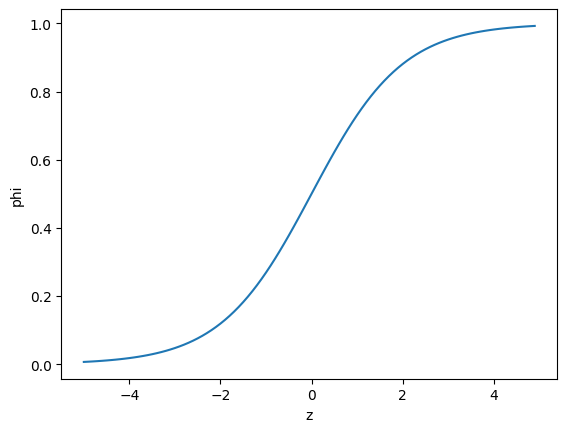

In [ ]:
# 시그모이드 함수 동작 시각화
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
# 이진분류일 경우
# 시그모이드 함수의 출력이 0.5 보다 크면 양성 클래스, 0.5 보다 작으면 음성 클래스로 판단

# ↓ 도미와 빙어 2개를 사용하여 이진 분류를 수행해보겠습니다
# 사이킷 런은 정확히 0.5 인 경우 음성 클래스로 판정


In [ ]:
# train 세트에서 Bream 과 Smelt 만 선택하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [ ]:
np.sum(bream_smelt_indexes) # 도미 + 빙어 => 33

33

In [ ]:
# boolean selection

train_bream_smelt = train_scaled[bream_smelt_indexes]
train_bream_smelt.shape

(33, 5)

In [ ]:
target_bream_smelt = train_target[bream_smelt_indexes]
target_bream_smelt.shape

(33,)

In [ ]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

```python
class sklearn.linear_model.LogisticRegression(
  penalty='l2',
  *,
  dual=False,
  tol=0.0001,
  C=1.0,
  fit_intercept=True,
  intercept_scaling=1,
  class_weight=None,
  random_state=None,
  solver='lbfgs',
  max_iter=100,
  multi_class='deprecated',
  verbose=0,
  warm_start=False,
  n_jobs=None,
  l1_ratio=None)
```


In [ ]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 첫 5개 샘플 예측
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# target 값과 비교
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
# 첫 5개의 샘플 예측확률 출력
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
# LogisticRegression  이 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [ ]:
# z = -0.404 x (Weight) - 0.576 x (Length)
#      - 0.663 x (Diagonal) - 1.013 x (Height) - 0.732 x (Width) - 2.161

# LogisticRegression 은 z 값을 계산하는 함수 제공 -> decision_function()

In [ ]:
# 첫 5개의 샘플의 z 값을 출력

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [ ]:
# 위 z 값을 시그모이드 함수 통과 시키면 '확률' 값 얻을수 있다

# 파이썬의 scipy 라이브러리에 시그모이드 함수가 있다. => expit()
# np.exp()  함수를 사용해 분수 계산하는 것보다 훨씬 편리하고 안전.

In [ ]:
from scipy.special import expit

print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
"""
↑ 출력된 값을 보면 아까의 predict_proba() 출력의 '두번째 열'의 값과 동일하다!  (왜지?)
  즉, decision_function()  메소드는 '양성 클래스'에 대한 z 값을 리턴하는 겁니다

[[0.99759855 0.00240145]   <- 도미의 확률이 높다.
 [0.02735183 0.97264817]   <- 두번째 샘플만 빙어의 확률이 높다.
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
"""
None


## 로지스틱 회귀로 다중분류 수행하기

### max_iter=, L2규제, C=

In [ ]:
# 7개의 생성 다중분류 .
# 이진분류 때와의 차이점

# LogisticRegression 은 기본적으로 '반복 알고리즘' 사용
# max_iter=  로 '반복 횟수' 지정. (기본값 100)

# 릿지 회귀 와 마찬자기로 '계수의 제곱을 규제' => 'L2 규제' 라고 함.
#  C= 매개변수로 규제 제어함.
#     릿지회귀의 alpha= 와 달리, C값은 작을수록 규제가 커집니다. (기본값 1)



In [ ]:
lr = LogisticRegression(C=20, max_iter=1000) # 규제는 완화, 반복횟수는 늘림
lr.fit(train_scaled, train_target) # 7가지의 생선 데이터

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
# 테스트셋 첫 5개의 샘플 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [ ]:
# target 값 확인
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [ ]:
# 5개 샘플에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 다중 분류일 경우 선형방정식은 어떤 모습일까?

In [ ]:
lr.coef_

array([[-1.50605456, -1.03747913,  2.60919713,  7.69422741, -1.18603342],
       [ 0.19200046, -1.99988812, -3.79617724,  6.5031264 , -2.00022753],
       [ 3.55793539,  6.36988929, -8.52233733, -5.75397233,  3.79233437],
       [-0.11453309,  3.61060122,  3.94464503, -3.62243904, -1.75981679],
       [-1.40843718, -6.09242191,  5.28629634, -0.8669657 ,  1.84518456],
       [-1.33419947,  1.48153392,  1.38217547, -5.6602348 , -4.39228965],
       [ 0.61328845, -2.33223525, -0.90379939,  1.70625807,  3.70084846]])

In [ ]:
lr.intercept_

array([-0.10345047, -0.27281218,  3.24444853, -0.17565069,  2.64960025,
       -6.72042849,  1.37829306])

In [ ]:
# 이진분류에서 보았던 z 를 7 개를 계산한다!    (이진분류 때는 양성클래스에 대해서만 계산했었다)
# 다중분류에서는 클래스마다 z값 계산!
# 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다

## 소프트맥스(softmax)

In [ ]:
# 확률은 어떻게 계산?
# 이진분류 에서는 -> 시그모이드 함수 사용  z 를 0 ~ 1사이로 변환
# 다중분류 에서는 -> 소프트맥스 함수 사용  7개(클래스개수)의 z 값을 확률로 변환

In [ ]:
# 소프트맥스 함수란?
#   시그모이드 함수는 하나의 선형방정식의 출력값을 0 ~ 1 사이로 압축합니다.
#   이와 달리 소프트맥스 함수는
#     - 여러개의 선형방정식의 출력값을 0 ~ 1 사이로 압축하고,
#     - 전체 합이 1이 되도록 만듭니다.

#   이를 위해 지수함수를 사용하기 때문에 '정규화된 지수함수' 라고도 부릅니다.



#### 소프트맥스의 계산 방식

7개의 z 값의 이름을 $z1$ ~ $z7$ 이라고 하자.

$z1$ ~ $z7$ 까지 값을 사용해 지수함수  $e^{z1}$ ~ $e^{z7}$ 을 계산해 모두 더합니다

이를 $\text{e_sum}$ 이라 하겠습니다
<br><br>
$\text{e_sum} =  e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}$
<br><br>


In [ ]:
"""
그 다음 e^z1 ~ e^z7 을 각각 e_sum 으로 나누어 주면 됩니다

           e^z1                      e^z2                  e^z7
    s1 =  ──────  , s2 =  ──────  , ... , s7 =  ──────
           e_sum                     e_sum                 e_sum


    s1 에서 s7 까지 모두 더하면 1이 됩니다.  7개 생선에 대한 확률의 합은 1이 되는 겁니다.
"""
None

In [ ]:
# decision_function() 으로 z1 ~ z7 까지 값을 구하고
# 소프트맥스 함수를 사용해 확률로 바꾸어 보자


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(lr.classes_)
print(np.round(decision, decimals=2))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [ ]:
from scipy.special import softmax # scipy 에서 softmax 함수도 제공

In [ ]:
proba = softmax(decision, axis=1)
print(lr.classes_)
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 위에서 보았던 prdict_proba() 함수의 결괏값과 동

# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
# [[0.    0.014 0.842 0.    0.135 0.007 0.003]
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ]
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ]
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076]
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]]

In [ ]:
np.sum(proba, axis=1)

array([1., 1., 1., 1., 1.])

1. 생선의 여러 특성값을 통해 어떤 생선인지 예측 '확률' 구하는 문제
1. KNN 이웃 모델의 문제
    1. 확률을 출력할수는 있지만 이웃한 샘플의 클래스 비율이 항상 정해진 확률만 출력
1. 이를 위해 로지스틱회귀  분류 알고리즘 사용  (분류모델 이다!)
    1. 선형회귀처럼 선형방정식 사용
    1. 그러나 계산한 값 그대로 출력하는게 아니라 0 ~ 1 사이로 압축 (즉 0%~100% 사이)
    1. 이진분류에서는 하나의 선형방정식을 훈련함
        1. 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값 만듬 (이것은 양성클래스의 확률)
        1. 1 에서 위 양성클래스 확률을 빼면 음성클래스 확률 값이다
       
    1. 다중분류의 경우 클래스 개수만큼 방정식을 훈련
        1. 그 다음 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체클래스에 대한 합이 항상 1이 되도록 만듬
        1. 이 값을 각 클래스에 대해 확률로 이해할 수 있습니다.
